# **Wiktor C. 311501 LSZ lab4 12.04.2024**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import networkx as nx
import random
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 18

In [30]:
def get_ER_graph(N:int=500, p:float=0.1, method:str='random', out_file:str=None, timeout:int=None) -> nx.graph:
    """
    # Parameters:
    N: int
        Number of nodes
    p: float
        Probability of each edge
    method: str
        Should be either `'random'` or `'mc'`. Returns ValueError. In `'random'` method each pair of nodes is connected with an edge with propability `p`. In `'mc'` method, Metropolis algorithm is used as per `https://www.if.pw.edu.pl/~agatka/pub/2014rozdzERG.pdf` 
    out_file: str
        File path where number of edges is written. Defaults to `None`
    timeout: int
        Number of timesteps at which the simulation stops

    # Returns:
    G: nx.graph
        networkx Graph
    """

    if method not in ['random', 'mc']:
        raise ValueError("Mehod parameter should be either 'random' or 'mc'")
    
    if timeout is None:
        timeout = N * 5 * 10**3
    
    if N > 500:
        print("WARNING! The timeout might be too small. Experimentally find sufficiently long number of steps")
    
    Edges = np.zeros((N, N))

    if method == 'random':
        for i in range(1, N):
            for j in range(i):
                if random.random() < p:
                    Edges[i, j] = 1

    if method == 'mc':
        # edges_thresh = 1e-10
        p_add = p / (1-p)
        p_remove = (1-p) / p
        t = 0
        mean_edges = np.sum(Edges) / N * 2
        if out_file is not None:
            T, E = [], []

        while(True):
            t += 1
            i = random.randint(1, N-1)
            j = random.randint(0, i-1)
            if Edges[i, j] == 1 and random.random() < p_remove:
                Edges[i, j] = 0
            elif Edges[i, j] == 0 and random.random() < p_add:
                Edges[i, j] = 1

            if not t%(100*N):
                mean_edges_temp = np.sum(Edges) / N * 2
                change = np.abs(mean_edges_temp - mean_edges) / (mean_edges + 1e-2)
                if out_file is not None:
                    T.append(t)
                    E.append(mean_edges_temp)
                # CHEKING THE ABSOLUTE DIFFERENCE IN AVERAGE LINKS WAS UNSTABLE AND CAUSED PREMATURE STOP
                # EXPERIMENTALLY FOUND TIMEOUT WAS IMPLEMENTED
                # if change < edges_thresh:
                #     print("Finished MC simulation after ", t, " time steps. The last change was ", change)
                
                mean_edges = mean_edges_temp   
            if t > timeout:
                print("Finished MC simulation after ", t, " time steps. The last change was ", change)
                break

    if out_file is not None:
        with open(out_file, 'w') as file:
            for t, e in zip(T, E):
                file.write(f"{t},{e}\n")

    G = nx.Graph(Edges)
    return G

Finished MC simulation after  2500001  time steps. The last change was  0.0029040454967127487
Finished MC simulation after  2500001  time steps. The last change was  0.002291016352129246


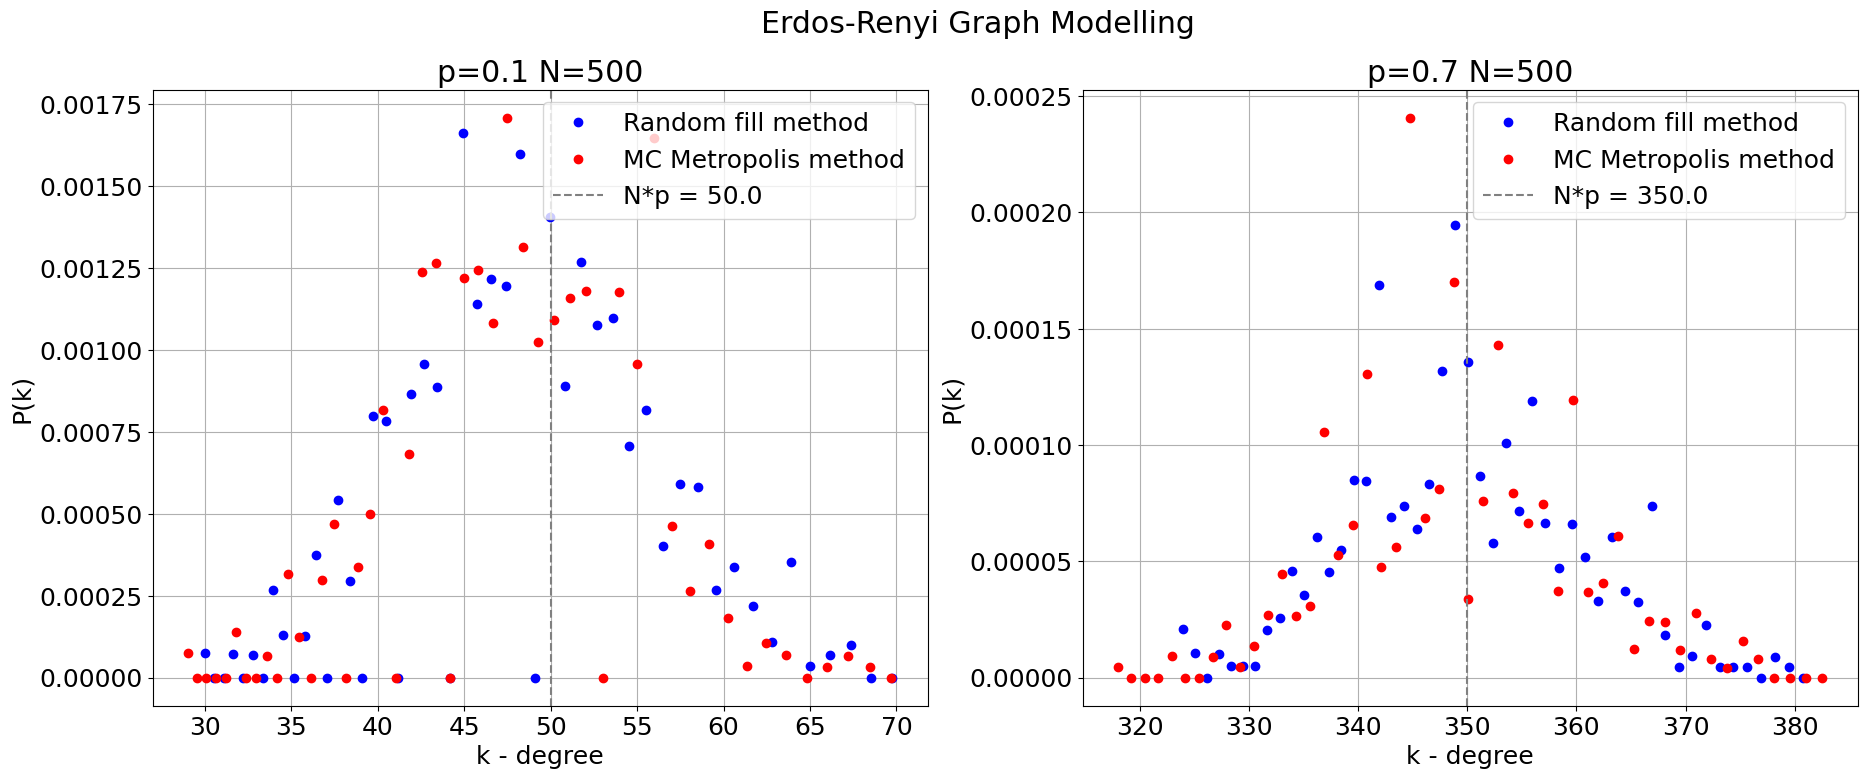

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(22, 8))
fig.suptitle("Erdos-Renyi Graph Modelling")

############################################################################################
p = 0.1
N = 500

G = get_ER_graph(N=N, p = p, method='random')
K = list(dict(nx.degree(G)).values())

k_min, k_max = np.min(K), np.max(K)
bins = np.logspace(math.log(k_min), math.log(k_max), base=math.e)

hist, edges = np.histogram(K, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(K)

ax[0].plot(edges[:-1], P, 'ob', label='Random fill method')

# -------------------------------------------------------------------------------------------

G = get_ER_graph(N=N, p = p, method='mc')
K = list(dict(nx.degree(G)).values())

k_min, k_max = np.min(K), np.max(K)
bins = np.logspace(math.log(k_min), math.log(k_max), base=math.e)

hist, edges = np.histogram(K, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(K)

ax[0].plot(edges[:-1], P, 'or', label='MC Metropolis method')

ax[0].axvline(N*p, color='grey', linestyle = '--', label=f'N*p = {N*p}')
ax[0].set_title(fr"p={p} N={N}")
ax[0].set_ylabel("P(k)")
ax[0].set_xlabel("k - degree")
ax[0].legend()

############################################################################################
p = 0.7

G = get_ER_graph(N=N, p = p, method='random')
K = list(dict(nx.degree(G)).values())

k_min, k_max = np.min(K), np.max(K)
bins = np.logspace(math.log(k_min), math.log(k_max), base=math.e)

hist, edges = np.histogram(K, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(K)

ax[1].plot(edges[:-1], P, 'ob', label='Random fill method')

# -------------------------------------------------------------------------------------------

G = get_ER_graph(N=N, p = p, method='mc')
K = list(dict(nx.degree(G)).values())

k_min, k_max = np.min(K), np.max(K)
bins = np.logspace(math.log(k_min), math.log(k_max), base=math.e)

hist, edges = np.histogram(K, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(K)

ax[1].plot(edges[:-1], P, 'or', label='MC Metropolis method')

# ax[1].set_ylim(ax[0].get_ylim())
ax[1].axvline(N*p, color='grey', linestyle = '--', label=f'N*p = {N*p}')
ax[1].set_title(fr"p={p} N={N}")
ax[1].set_ylabel("P(k)")
ax[1].set_xlabel("k - degree")
ax[1].legend()



Finished MC simulation after  2500001  time steps. The last change was  0.0012740375044790393
Finished MC simulation after  2500001  time steps. The last change was  0.0013747357929648416


Text(0.5, 0.98, 'Average n. of edges vs time')

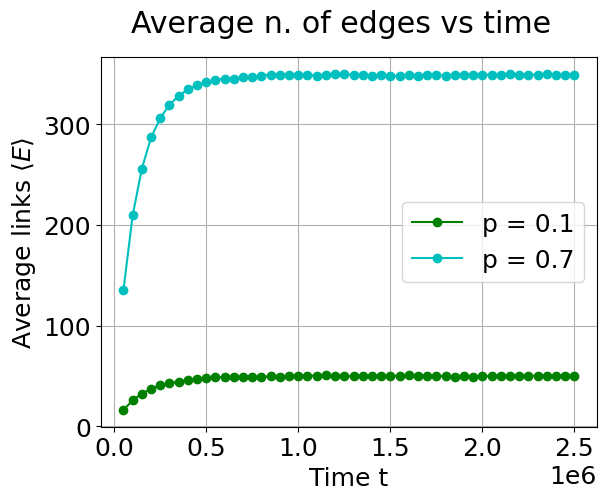

In [32]:
path = 'MC_p01.txt'
E, T = [], []
G = get_ER_graph(N=500, p = 0.1, method='mc', out_file=path)
with open(path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        t, e = line.split(',')
        T.append(float(t))
        E.append(float(e))
plt.plot(T, E, 'og-', label='p = 0.1')

path = 'MC_p07.txt'
E, T = [], []
G = get_ER_graph(N=500, p = 0.7, method='mc', out_file=path)
with open(path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        t, e = line.split(',')
        T.append(float(t))
        E.append(float(e))
plt.plot(T, E, 'oc-', label="p = 0.7")

plt.ylabel(r'Average links $\langle E \rangle$')
plt.xlabel('Time t')
plt.legend()

plt.suptitle("Average n. of edges vs time")
